# Linear Classification and Gradient Descent
## 1. Load the dataset
Import necessary packages and set parameters.

In [84]:
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

epoch = 30
eta = 0.25
lbda = 1.4

Load the dataset and divide dataset into training set and validation set.

In [85]:
def get_data():
    data_path = './australian_scale'
    X, y = load_svmlight_file(data_path)
    X = X.toarray()
    b = np.ones((X.shape[0], 1))
    X = np.concatenate((b, X), axis=1)
    y = np.expand_dims(y, axis=1)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = get_data()

print('Training data set contains {} examples with {} dimensions'.format(X_train.shape[0], X_train.shape[1]))
print('Validation data set contains {} examples with {} dimensions'.format(X_val.shape[0], X_val.shape[1]))

Training data set contains 462 examples with 15 dimensions
Validation data set contains 228 examples with 15 dimensions


## 2. Initalize SVM Regression model parameters

In [86]:
n, dim = X_train.shape
val_n = X_train.shape[0]
W = np.random.randn(dim, 1)

## 3. Optimization
Define function to plot loss.

In [87]:
def plot_loss(train_loss, val_loss):
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='train', linewidth=2.0)
    ax.plot(val_loss, label='validation', linewidth=2.0)
    ax.set(xlabel='Iteration', ylabel='Loss')
    ax.grid()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    plt.show()
    
def plot_error(val_loss):
    fig, ax = plt.subplots()
    ax.plot(val_loss, linewidth=2.0)
    ax.set(xlabel='Iteration', ylabel='Error')
    ax.grid()
    plt.show()

Update model parameters using gradient descent
#### SVM loss function:
$$L = \frac{1}{N} \sum_{i = 1}^N \left[ \frac{\lambda}{2} \Vert W \Vert^2 + \max(0, 1 - y_iW^T x_i) \right]$$
#### The gradient with respect to the weight:
$$g = 
\begin{cases}
\frac{1}{N} \sum_{i=1}^{N} \lambda W& y_iW^T x_i > 1\\
\frac{1}{N} \sum_{i=1}^{N} \left[\lambda W - x_i y_i\right] & y_iW^T x_i \leq 1
\end{cases}$$
#### Using SGD to update the weight:
$$W_{t+1} = W_t - \eta \cdot g ,$$
where the positive scalar $\eta$ is the learning rate.

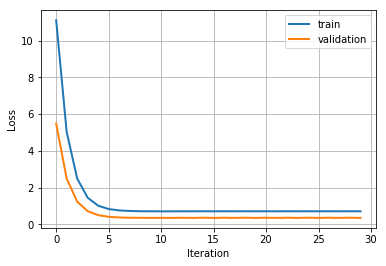

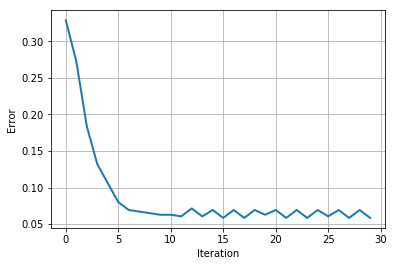

The minimum validation error is: 0.05844155844155844


In [88]:
def GD_train(X_train, y_train, X_val, y_val, W):
    train_loss = np.zeros((epoch, ))
    val_loss = np.zeros((epoch, ))
    val_error = np.zeros((epoch, ))
    for i in range(epoch):
        condition = y_train * (X_train.dot(W))
        val_condition = y_val * (X_val.dot(W))
        condition_n = len(np.where(condition <= 1)[0])
        train_loss[i] = np.sum(np.dot(W.T, W) / 2.0 * lbda + np.maximum(0, 1 - condition)) / n
        val_loss[i] = np.sum(np.dot(W.T, W) / 2.0 * lbda + np.maximum(0, 1 - val_condition)) / val_n
        val_error[i] = np.where(val_condition < 0)[0].size / val_n
        W_grad = lbda * n * W - np.sum((y_train[np.where(condition <= 1)[0], :] * X_train[np.where(condition <= 1)[0], :]).T, axis=1, keepdims=True)
        W_grad = W_grad / n
        W = W - eta * W_grad
    return train_loss, val_loss, val_error

train_loss, val_loss, val_error = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
plot_loss(train_loss, val_loss)
plot_error(val_error)
print('The minimum validation error is: {}'.format(np.min(val_error).item()))

## 4. Investigate the sensitiveness of the parametes
### 4.1 Investigate the sensitiveness of $\eta$

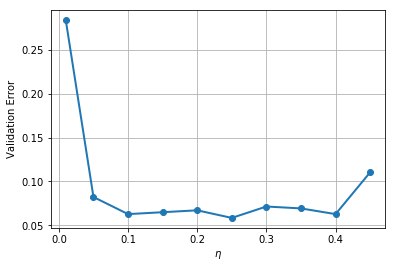

In [89]:
epoch = 30
lbda = 1.4
eta_list = np.arange(0.1, 0.5, 0.05)
eta_list = np.insert(eta_list, 0, [0.01, 0.05])
# eta_list_detail = eta_list[1:-1]

num_eta = eta_list.size
val_error_list = np.zeros((num_eta, ))
val_loss_list = np.zeros((num_eta, ))
for i in range(num_eta):
    eta = eta_list[i].item()
    train_loss, val_loss, val_error = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
    val_error_list[i] = val_error[-1]
    val_loss_list[i] = val_loss[-1]

# val_loss_last_detail = val_loss_last[1:-1]

plt.plot(eta_list, val_error_list, 'o-', linewidth=2.0)
plt.xlabel(r'$\eta$')
plt.ylabel('Validation Error')
plt.grid()

### 4.2 Investigate the sensitiveness of lambda

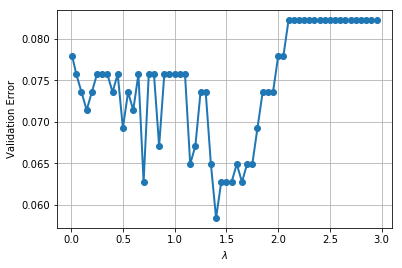

In [90]:
epoch = 30
eta = 0.25
lbda_list = np.arange(0.1, 3, 0.05)
lbda_list = np.insert(lbda_list, 0, [0.01, 0.05])

num_lbda = lbda_list.size
val_error_list = np.zeros((num_lbda, ))
val_loss_list = np.zeros((num_lbda, ))
for i in range(num_lbda):
    lbda = lbda_list[i].item()
    train_loss, val_loss, val_error = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
    val_error_list[i] = val_error[-1]
    val_loss_list[i] = val_loss[-1]
    
plt.plot(lbda_list, val_error_list, 'o-', linewidth=2.0)
plt.xlabel(r'$\lambda$')
plt.ylabel('Validation Error')
plt.grid()

### 4.3 Investigate the sensitiveness of lambda

Epoch list:
[10 20 30 40 50 60 70 80 90]


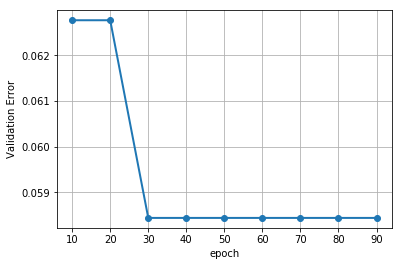

In [91]:
eta = 0.25
lbda = 1.4
epoch_list = np.arange(10, 100, 10)
print('Epoch list:')
print(epoch_list)

num_epoch_in_list = epoch_list.size
val_loss_last = np.zeros((num_epoch_in_list, ))
val_error_list = np.zeros((num_epoch_in_list, ))
for i in range(num_epoch_in_list):
    epoch = epoch_list[i].item()
    train_loss, val_loss, val_error = GD_train(X_train, y_train, X_val, y_val, np.copy(W))
    val_error_list[i] = val_error[-1]
    val_loss_list[i] = val_loss[-1]

plt.plot(epoch_list, val_error_list, 'o-', linewidth=2.0)
plt.xlabel('epoch')
plt.ylabel('Validation Error')
plt.grid()